In [9]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
from glob import glob
import sys
sys.path.append('../')
from utils import *

In [14]:
frames=read_video('../input-video/test-left-pitch-1.mp4')
with open('../track-stub/tracks-left-v8m-3.pkl','rb') as load:
    tracks=pickle.load(load)

In [4]:
cv2.imwrite('img/frame-1.jpg',frames[0])

True

In [8]:
cv2.imshow('frame-1',cv2.imread('img/frame-1.jpg'))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
for track_id,values in tracks['players'][0].items():
    bbox=values['bbox']
    cropped_img=frames[0][int(bbox[1]):int(bbox[3]),int(bbox[0]):int(bbox[2])]
    cv2.imwrite(f"img/track_id-{track_id}.jpg",cropped_img)

In [16]:
def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

1


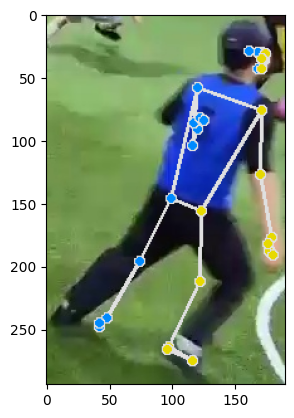

2


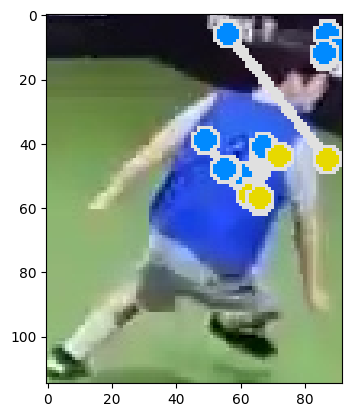

3


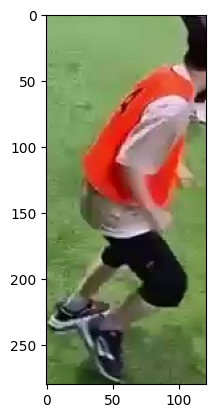

4


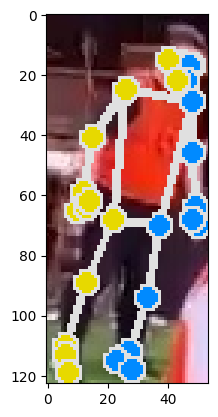

5


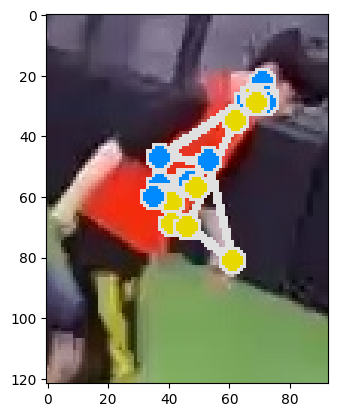

6


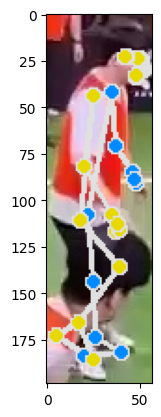

In [17]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path='../model/pose_landmarker_heavy.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True,
    )
detector = vision.PoseLandmarker.create_from_options(options)

img_list=glob('img/track*')
for img_path in img_list:
    track_id=int(img_path.split('-')[-1].split('.')[0])
    # STEP 3: Load the input image.
    image = mp.Image.create_from_file(img_path)

    # STEP 4: Detect pose landmarks from the input image.
    detection_result = detector.detect(image)
    # print(len(detection_result.pose_landmarks[0]))
    # STEP 5: Process the detection result. In this case, visualize it.
    annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
    print(track_id)
    plt.imshow(annotated_image)
    plt.show()

In [19]:
import cv2
import mediapipe as mp

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# 웹캠에서 이미지를 캡처합니다.
cap = cv2.VideoCapture(0)

with mp_pose.Pose(min_detection_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            continue

        # RGB로 변환합니다.
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # 포즈를 검출합니다.
        results = pose.process(image)

        # 검출된 포즈를 그립니다.
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        # 결과를 화면에 표시합니다.
        cv2.imshow('MediaPipe Pose', frame)

        if cv2.waitKey(5) & 0xFF == 27:
            break

cap.release()

c:\envs\yolo_env\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


KeyboardInterrupt: 